# Setup 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Arrays and linked lists

Computer memory can be thought of as a grid with *drawers*, where each drawer can store an item of a certain size (for example, a byte). To store something in memory, the computer must allocate enough drawers to fit the entire item. Two of the most commonly used ways to store information are **arrays** and **linked lists**.

Arrays work by storing all of their elements contiguously in memory (this is, in adjacent drawers). This provides them with efficient access to any of their elements (i.e., *random access*), but makes insertions of new elements problematic. Consider a given array, which occupies 4 contiguous such drawers, while the 5th location is reserved for another program. If this array is to be elongated, the requirement of being stored in contiguous memory directions means that the whole array has to be moved to a new location in memory with available space! This makes inserting elements in arrays inefficient. A partial workaround to this is allocating more memory than what is strictly needed, but this can lead to unused memory, or if the extra allocation is consumed, to having to move the array anyway. 

Linked list work by storing each item in random memory addresses, while every item contains the direction of the next element (thus, being *linked*). This allows for easy insertion of elements, as one only needs to add a new address to the last (or other) corresponding item, and there is never a need to relocate any items in memory. The drawback, of course, is that one cannot quickly access an arbitrary element in a linked list, and must instead go through the all the preceding memory addresses (from the first to the Nth) until the desired element is reached.

Another way of looking at this is that in an array, if the first item is stored in address `00`, one can simply calculate the that 10th item is in address `09`. Contiguous storage means predictable (and thus, fast) location in memory.

>The position of an element is called its *index*. Throughout this book, *index* will be used as to mean *position*.

>With each item in a linked list, you use a little bit of memory to store the address of the next item. This is called a *pointer* (as seen in lower-level languages like C)

# Insertions and deletions

With linked lists, insertions are easy, even in the middle of the list, since it is enough to change the linkage to include a new item in the new inserted position. Deletions are equivalently easy.

$A \rightarrow B$

$A \rightarrow newItem \rightarrow B$

In the case of arrays, insertions can lead to moving the whole array to a different memory address, to preserve contiguity. For this same reason, whenever we want to remove an item from an array, we will have to move every item coming after it up a position, making the operation equivalent, in terms of complexity, to insertion.

Here is a summary of the run times for common operations on arrays and lists

|          |  Arrays  | Lists |
|----------|----------|----------|
| Reading    | $O(1)$  | $O(n)$  |
| Insertion  | $O(n)$  | $O(1)$  |
| Deletion   | $O(n)$  | $O(1)$  |

> Note: It is common practice to keep track of the first and last items in a linked list, so that insertions and deletions are $O(1) time (it requires instant access to the element to be deleted)

# Arrays are better (?)

Arrays are often used because they have a lot of advantages over linked lists.

Arrays provide random access. There are two types of access, *random* and *sequential*. Sequential means reading the elements one by one, starting with the first element. Linked list can only do sequential access (this is why reads are slow!). Random access means you can jump directly to the Nth element. A lot of use cases require random access, so arrays are used a lot.

Additionally, arrays can use *caching*, a technique by which instead of an item, a whole section of items are read, which is faster. Linked list cannot do this.

Since linked list have to "waste" some memory storing the memory address of the next item, they are often less memory-efficient than arrays, specially if the size of each item is pretty small. If each item is big, a single slot of extra memory (which is common in arrays) can be a big deal, and in that case the memory used to store the pointers is very small in comparison.

Arrays are used more often than linked lists except in specific use cases.

# Selection sort

The `selection sort` algorithm works by, for a given list of items:
* Selecting the highest or lowest one, and appending it to a new list
* Deleting that item from the original list
* Repeat

How long will take to run this algorithm? We will have to through every item ($O(n)$) a number of times equal to the length of the list ($O(n)$). In other words, the `selection sort` algorithm will take $O(n \times n) = O(n^2)$ time.

What's that? That you will have to go through a progressively smaller list every time? That instead of $n^2$ it should be $(n-1), (n-2), (n-3) ..., 2, 1$, and that on average we will check a list that has $\frac{1}{2} \times n$ elements? Good try, but constants like $\frac{1}{2}$ are ignored in big O notation (see chapter 4 for the full discussion. Thus, we write $O(n \times n) = O(n^2)$

Let us check the code

In [2]:
def findSmallest(arr):
    """
    Finds the index of the lowest value in an array
    """
    # set initial state
    smallest = arr[0]
    index_smallest = 0
    n_operations = 0

    # iterate through every item in the array and track which is the smallest
    for i in range(1, len(arr)):
        if arr[i] < smallest:
            smallest = arr[i]
            index_smallest = i
            
        n_operations += 1

    # return the index of the smallest item
    return index_smallest, n_operations


def selection_sort(arr):
    # set initial state
    newArr = []
    copiedArr = list(arr) # copy array before changing it
    N_operations = 0

    # iteratively find and remove the smallest item of the array
    # and add it to the new array
    for i in range(len(copiedArr)):
        index_smallest, n_operations = findSmallest(copiedArr)
        newArr.append(copiedArr.pop(index_smallest))

        N_operations += n_operations

    # return sorted array
    return newArr, N_operations

In [3]:
# test run
arr = [100,0,1,3,5,7,9,12,15,64,101,105,107,109,201,401]

newArr, N_operations = selection_sort(arr)
print(newArr)
print(f"Number of operations: {N_operations}")

[0, 1, 3, 5, 7, 9, 12, 15, 64, 100, 101, 105, 107, 109, 201, 401]
Number of operations: 120


# Analysis of running time

In [4]:
# check how the number of operations grows!
list_N_operations = []

for N_size in range(1,20):
    arr = np.random.randint(low=0, high=100, size=N_size)
    newArr, N_operations = selection_sort(arr)
    print(f">{newArr}")
    print(f"Number of operations: {N_operations}")
    list_N_operations.append(N_operations)

>[91]
Number of operations: 0
>[66, 94]
Number of operations: 1
>[32, 75, 75]
Number of operations: 3
>[23, 39, 81, 92]
Number of operations: 6
>[6, 49, 71, 80, 89]
Number of operations: 10
>[16, 19, 42, 46, 56, 71]
Number of operations: 15
>[17, 28, 50, 52, 66, 67, 91]
Number of operations: 21
>[6, 21, 36, 59, 73, 73, 75, 86]
Number of operations: 28
>[37, 42, 51, 52, 67, 84, 95, 97, 99]
Number of operations: 36
>[7, 12, 24, 37, 64, 64, 69, 69, 84, 99]
Number of operations: 45
>[12, 23, 37, 42, 47, 57, 61, 63, 67, 76, 77]
Number of operations: 55
>[10, 22, 29, 34, 41, 42, 44, 46, 52, 65, 84, 86]
Number of operations: 66
>[7, 8, 10, 15, 48, 52, 58, 63, 69, 81, 82, 86, 91]
Number of operations: 78
>[5, 8, 12, 20, 24, 29, 39, 56, 64, 65, 71, 75, 85, 99]
Number of operations: 91
>[15, 19, 20, 20, 27, 31, 35, 38, 45, 52, 53, 58, 72, 75, 78]
Number of operations: 105
>[7, 12, 17, 19, 29, 41, 42, 48, 49, 50, 57, 63, 63, 73, 79, 81]
Number of operations: 120
>[4, 8, 17, 18, 20, 22, 31, 34, 47

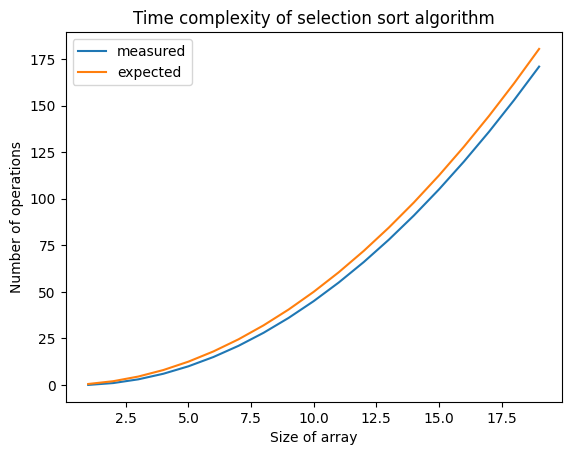

In [5]:
X = np.arange(1, 20)
plt.plot(X, list_N_operations, label='measured')

# notice the 1/2 factor! (see above)
Y_expected = 0.5*(X**2)
plt.plot(X, Y_expected, label='expected')
plt.legend()
plt.xlabel('Size of array')
plt.ylabel('Number of operations')
plt.title('Time complexity of selection sort algorithm')
plt.show()

# Exercises

**2.1** Suppose you are building an app to keep track of your finances. Every day, you write down everything you spent money on. At the end of the month, you review your expenses and sum up how much you spent. So you have lots of inserts and a few reads. Should you use an array or a list?

**Answer**: A linked list, as the most common operation is insertions, with only a monthly read. Also, the read is a read of *every* element in the list, for which linked lists are good.

**2.2** Suppose you’re building an app for restaurants to take customer orders. Your app needs to store a list of orders. Servers keep adding orders to this list, and chefs take orders off the list and make them. It’s an order queue: servers add orders to the back of the queue, and the chef takes the first order off the queue and cooks it. Would you use an array or a linked list to implement this queue?

**Answer**: A linked list, as as long as we store the memory address of the *oldest* added element, consuming the elements of the list one by one, in the direction of the newest additions, will be efficient.

**2.3** Let’s run a thought experiment. Suppose Facebook keeps a list of usernames. When someone tries to log in to Facebook, a search is done for their username. If their name is in the list of usernames, they can log in. People log in to Facebook pretty often, so there are a lot of searches through this list of usernames. Suppose Facebook uses binary search to search the list. Binary search needs random access—you need to be able to get to the middle of the list of usernames instantly. Knowing this, would you implement the list as an array or a linked list?

**Answer**: If we need random access, we should use an array (which has to be sorted!)


**2.4** People sign up for Facebook pretty often, too. Suppose you decided to use an array to store the list of users. What are the downsides of an array for inserts? In particular,  suppose you’re using binary search to search for logins. What happens when you add new users
to an array?


**Answer**: While using arrays would provide efficient access to the logins, adding new users might require to re-locate entire portions of our array very often (to ensure contiguous memory addresses of the items in the array), making the addition of new users slow (which might be fine if it does not happen very often).

**2.5** In reality, Facebook uses neither an array nor a linked list to store user information. Let’s consider a hybrid data structure: an array of linked lists. You have an array with 26 slots. Each slot points to a linked list. For example, the first slot in the array points to a linked list containing all the usernames starting with A. The second slot points to a linked list containing all the usernames starting with B, and so on.

Suppose Adit B signs up for Facebook, and you want to add them to the list. You go to slot 1 in the array, go to the linked list for slot 1, and add Adit B at the end. Now, suppose you want to search for Zakhir H. You go to slot 26, which points to a linked list of all the Z names. Then you search through that list to find Zakhir H.


Compare this hybrid data structure to arrays and linked lists. Is it slower or faster than each for searching and inserting? You don’t have to give big O run times, just whether the data structure would be faster or lower.



**Answer**: This hybrid data structure will be
* In terms of searching: slower than arrays, but faster than linked lists
* In terms of inserting: faster than arrays, and as fast as linked lists (because the access for the letter is instantaneous!.